In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

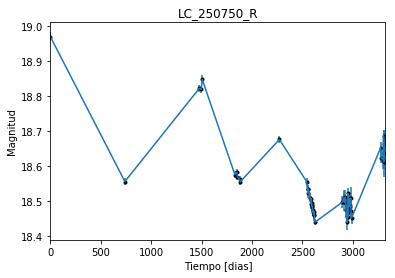

In [2]:
data = np.genfromtxt('LC_250750_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_250750_R')
plt.savefig("LC_250750_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

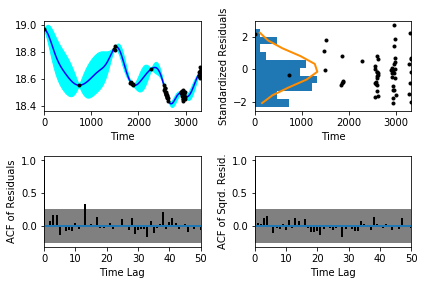

In [5]:
sample.assess_fit()

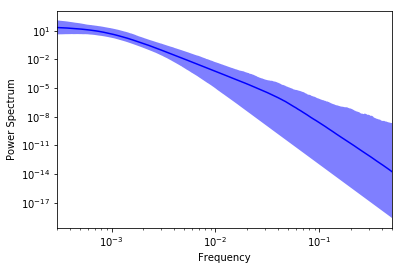

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

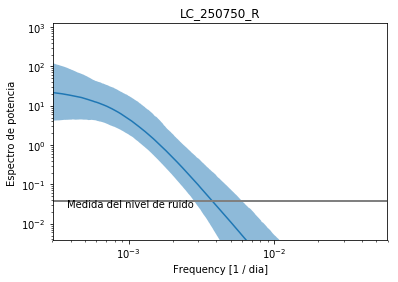

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_250750_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_250750_R')

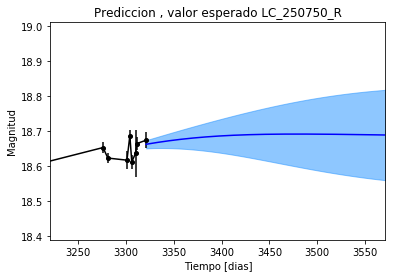

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_250750_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_250750_R')

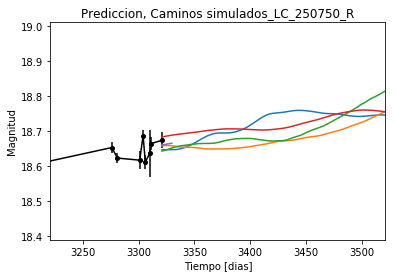

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_250750_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


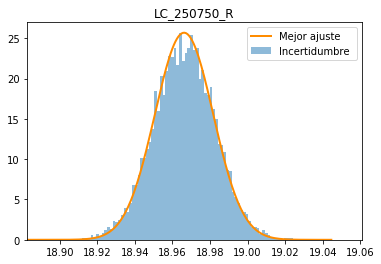

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_250750_R')
plt.savefig("Mejor_ajuste_LC_250750_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_250750_R')

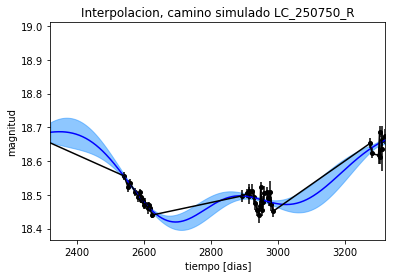

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_R')

Text(0.5,1,'Interpolacion, camino simulado LC_250750_R')

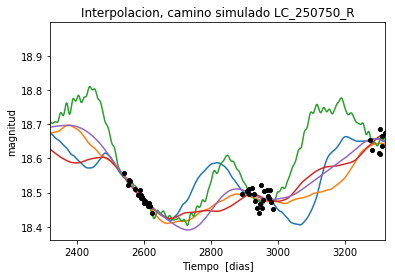

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_250750_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1015.58524543
Median: 0.00642514975522
Standard deviation: 0.176623459584
68% credibility interval: [ 0.00074477  0.13543265]
95% credibility interval: [  3.52864255e-04   7.12830161e-01]
99% credibility interval: [  3.10135745e-04   9.43539678e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 454.30874921
Median: 0.00115344805074
Standard deviation: 0.0807017747034
68% credibility interval: [ 0.00044453  0.01585724]
95% credibility interval: [ 0.00031858  0.25077146]
99% credibility interval: [  3.05169828e-04   5.75510606e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 679.154067016
Median: 0.00355713215706
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1733.60540566
Median: 145.675396449
Standard deviation: 1.62865639651
68% credibility interval: [ 143.8634818   146.85043751]
95% credibility interval: [ 141.2752622   147.57696203]
99% credibility interval: [ 139.45915261  147.80951345]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 692.223568233
Median: 0.394992605808
Standard deviation: 1.82531025605
68% credibility interval: [ 0.03782253  2.87161259]
95% credibility interval: [ 0.01210075  6.22139391]
99% credibility interval: [ 0.00914118  8.76154294]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 516.148247431
Median: 0.113511365588
Standard deviation: 7.34062709869
68% credibility interval: [ 0.00548864  4.56350586]
95% credibility interval: [  5.12203927e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19920.4838799
Median: 2.25623885591e-52
Standard deviation: 1.15296001711e+57
68% credibility interval: [  4.10982902e-82   3.72058311e-14]
95% credibility interval: [  1.60228303e-122   1.34804334e+000]
99% credibility interval: [  6.67327856e-146   2.80569721e+026]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1626.83985267
Median: 18.6750578155
Standard deviation: 0.111134161066
68% credibility interval: [ 18.58912233  18.77474459]
95% credibility interval: [ 18.47217478  18.91855037]
99% credibility interval: [ 18.35424837  19.04982527]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 544.499184418
Median: 0.00115856837505
Standard deviation: 0.218913370147
68% credibility interval: [ 0.          0.26132052]
95% credibility interval: [ 0.          0.83065613]
99% credibility interval: [ 0.          0.97829277]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 544.499184418
Median: 0.00115856837505
Standard deviation: 0.218913370147
68% credibility interval: [ 0.          0.26132052]
95% credibility interval: [ 0.          0.83065613]
99% credibility interval: [ 0.          0.97829277]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 495.595194915
Median: 0.0
Standard deviation: 0.000326314387126
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1733.60540566
Median: 145.675396449
Standard deviation: 1.62865639651
68% credibility interval: [ 143.8634818   146.85043751]
95% credibility interval: [ 141.2752622   147.57696203]
99% credibility interval: [ 139.45915261  147.80951345]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1968.43868956
Median: 0.0387519643596
Standard deviation: 0.0497194683358
68% credibility interval: [ 0.02218712  0.07458767]
95% credibility interval: [ 0.01395612  0.18056701]
99% credibility interval: [ 0.01083147  0.31168638]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2103.23370568
Median: 1.12197291794
Standard deviation: 0.174829398056
68% credibility interval: [ 0.97515487  1.30935506]
95% credibility interval: [ 0.85069937  1.54171042]
99% credibility interval: [ 0.78063129  1.70386949]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 832.410392479
Median: 1.30284689428e-05
Standard deviation: 0.00128598791577
68% credibility interval: [  5.63757033e-07   5.64896610e-04]
95% credibility interval: [  3.03347654e-08   3.66962249e-03]
99% credibility interval: [  1.62538704e-32   6.86976698e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1015.58524543
Median: (-0.0403704065384-0.172731375609j)
Standard deviation: 1.76733963163
68% credibility interval: [-0.85094846-0.24636949j -0.00467951-1.32994485j]
95% credibility interval: [ -4.47884399e+00+0.j          -2.21711150e-03-1.63384001j]
99% credibility interval: [ -5.92843464e+00+0.j          -1.94864036e-03-0.00472743j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 454.30874921
Median: (-0.00724732784498+0.00933272023221j)
Standard deviation: 1.46596071806
68% credibility interval: [-0.09963396 +4.09881526e+00j -0.00279304 +2.86482440e-03j]
95% credibility interval: [-1.57564357+1.66899644j -0.00200168+0.j        ]
99% credibility interval: [ -3.61603978e+00+4.66265704j  -1.91743858e-03+0.00700872j]
